In [1]:
/load machine learning library from: Machine Learning and Big Data with kdb+/q book by Novotny et al.
\c 100 100
\cd C:\q\w32\

/ Import Python libraries
\l p.q


\l quantQ\lib\quantQjupyterq.q
\l mlnotebooks\utils\graphics.q
\l automl/automl.q
.automl.loadfile`:init.q
/load mlnotebooks toolkit
\l ml/ml.q
.ml.loadfile`:init.q
.ml.loadfile`:graph/init.q
\l mlnotebooks\utils\graphics.q
\l mlnotebooks\utils\util.q
/graphing 
\l embedPy\examples\importmatplotlib.q
plt:.matplotlib.pyplot[]





Welcome to quantQ
   ____ \ \   
  / ___| \ \  
 | |_| |  ) )   
  \__  | / /   
     |_|/ /     

For available sub-namespaces, type key`.quantQ:
()

For functions in a namespace, type .e.g \f .quantQ.rf



2020-12-02 22:52:37.272142: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_101.dll
Using TensorFlow backend.


Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe
Requirements for latex report generation are not satisfied. Pylatex must be installed. Reportlab will be used for report generation.
Requirements for NLP models are not satisfied. gensim must be installed. NLP module will not be available.


In [2]:
show 20#t:("FFSFFSSSSSSSSSSSSFFFFSSSSSFSSSSSSSFSFFFSSSSFFFFFFFFFFSFSFSSFSFFSSSFFFFFFSSSFFFSSF";enlist",") 0: `:C:/MLProjects/HousePrices/train.csv

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour Utilities LotConfig ..
-------------------------------------------------------------------------------------------------..
1  60         RL       65          8450    Pave   NA    Reg      Lvl         AllPub    Inside    ..
2  20         RL       80          9600    Pave   NA    Reg      Lvl         AllPub    FR2       ..
3  60         RL       68          11250   Pave   NA    IR1      Lvl         AllPub    Inside    ..
4  70         RL       60          9550    Pave   NA    IR1      Lvl         AllPub    Corner    ..
5  60         RL       84          14260   Pave   NA    IR1      Lvl         AllPub    FR2       ..
6  50         RL       85          14115   Pave   NA    IR1      Lvl         AllPub    Inside    ..
7  20         RL       75          10084   Pave   NA    Reg      Lvl         AllPub    Inside    ..
8  60         RL                   10382   Pave   NA    IR1      Lvl         AllPub    Corner    ..


In [3]:
/Check Shape
-1"Shape of features is ",sv[" x "]string .ml.shape t;
/Check for duplicate rows
count[t]~count exec distinct Id from t

Shape of features is 1460 x 81


1b


In [4]:
/Initial check of data, looking for numeric, discrete, and continuous categories

TrainingPrice: exec SalePrice from t

prob_typ:`normal
tgt_typ:`reg

.automl.prep.i.describe[t]

             | count unique mean       std       min    max     type       
--           | ------------------------------------------------------------
Id           | 1460  1460   730.5      421.61    1f     1460f   numeric    
MSSubClass   | 1460  15     56.89726   42.30057  20f    190f    numeric    
LotFrontage  | 1460  111    70.04996   24.28475  21f    313f    numeric    
LotArea      | 1460  1073   10516.83   9981.265  1300f  215245f numeric    
OverallQual  | 1460  10     6.099315   1.382997  1f     10f     numeric    
OverallCond  | 1460  9      5.575342   1.112799  1f     9f      numeric    
YearBuilt    | 1460  112    1971.268   30.2029   1872f  2010f   numeric    
YearRemodAdd | 1460  61     1984.866   20.64541  1950f  2010f   numeric    
MasVnrArea   | 1460  328    103.6853   181.0662  0f     1600f   numeric    
BsmtFinSF1   | 1460  637    443.6397   456.0981  0f     5644f   numeric    
BsmtFinSF2   | 1460  144    46.54932   161.3193  0f     1474f   numeric    
BsmtUnfSF   

In [5]:
/Data Exploration for null 
/nulltablefunction:{![x;();0b;( cols x)!((count cols x)#0N)]}

nullExplore:flip `columnName`nullCount!(key;value)@\:sum null t
select from nullExplore where nullCount >0

columnName  nullCount
---------------------
LotFrontage 259      
MasVnrArea  8        
GarageYrBlt 81       


In [0]:
/First, we deal with Masonry Veneer nulls

select MasVnrType, MasVnrArea from t where MasVnrArea = 0N
t: update MasVnrArea:{$[x~0Ni;0;x]}0

nullExplore:flip `columnName`nullCount!(key;value)@\:sum null t
select from nullExplore where nullCount >0

[0;31mparse error[0m: [0;31mfrom[0m

In [6]:
/explore Lot data

select avg SalePrice from t where LotFrontage  = 0N
5#select LotFrontage, LotArea, LotConfig, LotShape from t where LotFrontage  = 0N

select avg SalePrice from t where (LotFrontage  = 0N)=0b
5#select LotFrontage, LotArea, LotConfig, LotShape from t where (LotFrontage  = 0N)=0b

SalePrice
---------
181620.1 


LotFrontage LotArea LotConfig LotShape
--------------------------------------
            10382   Corner    IR1     
            12968   Inside    IR2     
            10920   Corner    IR1     
            11241   CulDSac   IR1     
            8246    Inside    IR1     


SalePrice
---------
180770.5 


LotFrontage LotArea LotConfig LotShape
--------------------------------------
65          8450    Inside    Reg     
80          9600    FR2       Reg     
68          11250   Inside    IR1     
60          9550    Corner    IR1     
84          14260   FR2       IR1     


{[f;x]embedPy[f;x]}[foreign]enlist


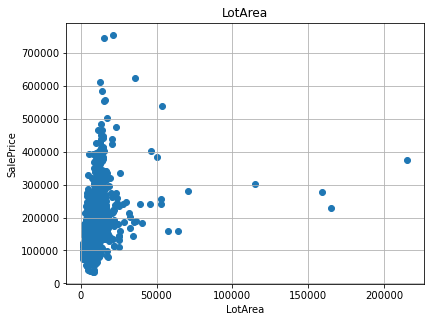

{[f;x]embedPy[f;x]}[foreign]enlist


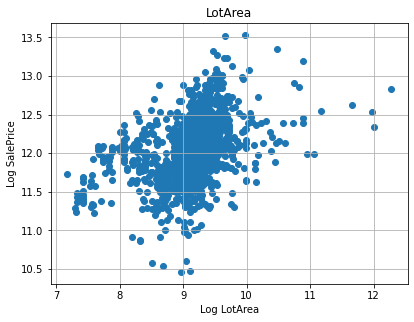

{[f;x]embedPy[f;x]}[foreign]enlist


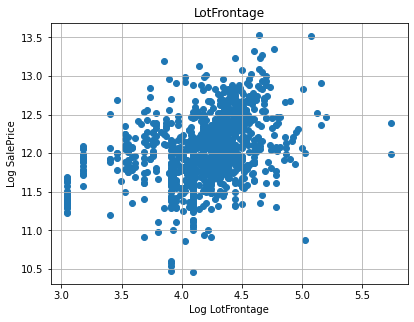

In [7]:
lots:exec LotArea from t
sales:exec SalePrice from t
frontage:exec LotFrontage from t

plt.scatter[lots;sales]
plt.xlabel"LotArea";
plt.ylabel"SalePrice";

plt.title"LotArea";
plt.grid 1b;
plt.show[];

plt.xlabel"Log LotArea";
plt.ylabel"Log SalePrice";
plt.title"LotArea";
plt.grid 1b;

plt.scatter[log lots; log sales]
plt.show[];

plt.xlabel"Log LotFrontage";
plt.ylabel"Log SalePrice";
plt.title"LotFrontage";
plt.grid 1b;

plt.scatter[log frontage; log sales]
plt.show[];

In [8]:
/explore possible pattern for LotFrontage nulls
avg select LotArea from t 
med select LotArea from t
avg select SalePrice from t
"Where LotFrontage has missing values:"
avg select LotArea from t where LotFrontage = 0N
med select LotArea from t where LotFrontage = 0N
avg select SalePrice from t where LotFrontage = 0N

LotArea| 10516.83


LotArea| 9478.5


SalePrice| 180921.2


"Where LotFrontage has missing values:"


LotArea| 13137.37


LotArea| 10624


SalePrice| 181620.1


In [9]:
/LotFrontage nulls have no effect on SalePrice, though 30% increase on LotArea avg, 10% on LotArea med
/Replace null values with median
medfrontage:med exec LotFrontage from t
t:update medfrontage^LotFrontage from t;

In [10]:
/explore garage data

select avg SalePrice from t where GarageType = `NA
5#select GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond from t where GarageYrBlt  = 0N

select avg SalePrice from t where (GarageType = `NA)=0b
5#select GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond from t where (GarageYrBlt  = 0N)=0b

SalePrice
---------
103317.3 


GarageType GarageFinish GarageCars GarageArea GarageQual GarageCond
-------------------------------------------------------------------
NA         NA           0          0          NA         NA        
NA         NA           0          0          NA         NA        
NA         NA           0          0          NA         NA        
NA         NA           0          0          NA         NA        
NA         NA           0          0          NA         NA        


SalePrice
---------
185479.5 


GarageType GarageFinish GarageCars GarageArea GarageQual GarageCond
-------------------------------------------------------------------
Attchd     RFn          2          548        TA         TA        
Attchd     RFn          2          460        TA         TA        
Attchd     RFn          2          608        TA         TA        
Detchd     Unf          3          642        TA         TA        
Attchd     RFn          3          836        TA         TA        


{[f;x]embedPy[f;x]}[foreign]enlist


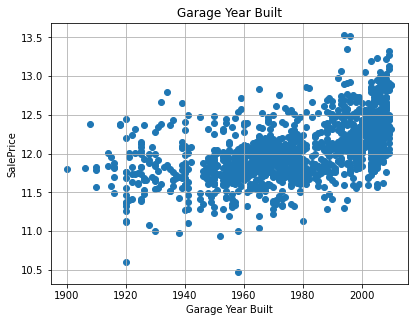

{[f;x]embedPy[f;x]}[foreign]enlist


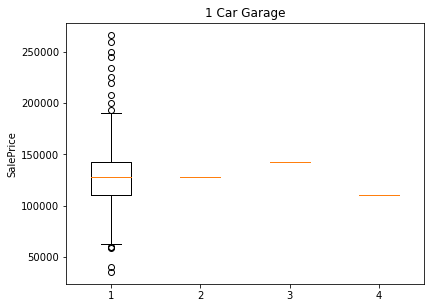

{[f;x]embedPy[f;x]}[foreign]enlist


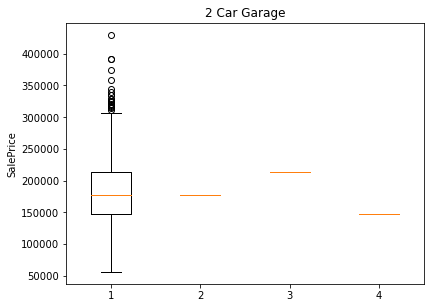

{[f;x]embedPy[f;x]}[foreign]enlist


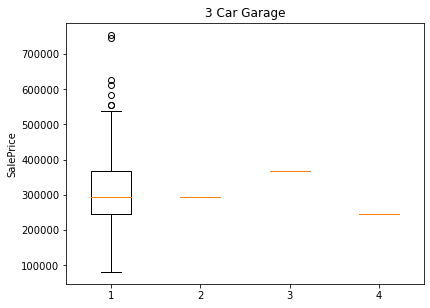

{[f;x]embedPy[f;x]}[foreign]enlist


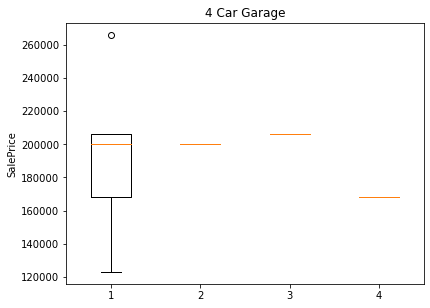

In [11]:
Year:exec GarageYrBlt from t
sales:exec SalePrice from t


plt.xlabel"Garage Year Built";
plt.ylabel"SalePrice";
plt.title"Garage Year Built";
plt.grid 1b;

plt.scatter[Year; log sales]
plt.show[];

garagecars1:exec GarageCars from t where GarageCars=1
sales1:exec SalePrice from t where GarageCars=1
sales1q1:.ml.percentile[sales1;.25]
sales1q2:.ml.percentile[sales1;.5]
sales1q3:.ml.percentile[sales1;.75]
garagecars1boxplotdata:(sales1; sales1q2; sales1q3; sales1q1)

garagecars2:exec GarageCars from t where GarageCars=2
sales2:exec SalePrice from t where GarageCars=2
sales2q1:.ml.percentile[sales2;.25]
sales2q2:.ml.percentile[sales2;.5]
sales2q3:.ml.percentile[sales2;.75]
garagecars2boxplotdata:(sales2; sales2q2; sales2q3; sales2q1)

garagecars3:exec GarageCars from t where GarageCars=3
sales3:exec SalePrice from t where GarageCars=3
sales3q1:.ml.percentile[sales3;.25]
sales3q2:.ml.percentile[sales3;.5]
sales3q3:.ml.percentile[sales3;.75]
garagecars3boxplotdata:(sales3; sales3q2; sales3q3; sales3q1)

garagecars4:exec GarageCars from t where GarageCars=4
sales4:exec SalePrice from t where GarageCars=4
sales4q1:.ml.percentile[sales4;.25]
sales4q2:.ml.percentile[sales4;.5]
sales4q3:.ml.percentile[sales4;.75]
garagecars4boxplotdata:(sales4; sales4q2; sales4q3; sales4q1)

garage1:(garagecars1;sales1)
garage2:(garagecars2;sales2)
garage3:(garagecars3;sales3)
garage4:(garagecars4;sales4)

plt.ylabel"SalePrice";
plt.title"1 Car Garage";
plt.boxplot[garagecars1boxplotdata]
plt.show[];

plt.ylabel"SalePrice";
plt.title"2 Car Garage";
plt.boxplot[garagecars2boxplotdata]
plt.show[];

plt.ylabel"SalePrice";
plt.title"3 Car Garage";
plt.boxplot[garagecars3boxplotdata]
plt.show[];

plt.ylabel"SalePrice";
plt.title"4 Car Garage";
plt.boxplot[garagecars4boxplotdata]
plt.show[];



In [12]:
/Let's explore the top 8 entries
flip () xkey -8#select by SalePrice from t

SalePrice    | 538000  555000  556581  582933  611657  625000  745000  755000 
Id           | 770     441     1047    804     899     1170    1183    692    
MSSubClass   | 60      20      60      60      20      60      60      60     
MSZoning     | RL      RL      RL      RL      RL      RL      RL      RL     
LotFrontage  | 47      105     85      107     100     118     160     104    
LotArea      | 53504   15431   16056   13891   12919   35760   15623   21535  
Street       | Pave    Pave    Pave    Pave    Pave    Pave    Pave    Pave   
Alley        | NA      NA      NA      NA      NA      NA      NA      NA     
LotShape     | IR2     Reg     IR1     Reg     IR1     IR1     IR1     IR1    
LandContour  | HLS     Lvl     Lvl     Lvl     Lvl     Lvl     Lvl     Lvl    
Utilities    | AllPub  AllPub  AllPub  AllPub  AllPub  AllPub  AllPub  AllPub 
LotConfig    | CulDSac Inside  Inside  Inside  Inside  CulDSac Corner  Corner 
LandSlope    | Mod     Gtl     Gtl     Gtl     Gtl  

In [13]:
/
Time to combine features and drop others using Multiple Factor Analysis
To do so, I need to replace categorical variables with "dummy variables" 0 and 1, ordinal variables with a scale
Note: ordinal variables will have an equal distance imposed on them, though this is likely appropriate for most variables
Normalize:LowQualFinSF by 1stFlrSF,2ndFlrSF, BsmtFinSF1 BsmtFinSF2 and BsmtUnfSF by TotalBsmtSF
Combine:
GARAGE INFO: GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, GarageYrBlt  
BASEMENT INFO: BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,
BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 

Above Grade INFO: 

\

In [14]:
/Look at garage categorical date
enlist exec distinct GarageType from t  
enlist exec distinct GarageFinish from t  
enlist exec distinct GarageQual from t  
enlist exec distinct GarageCond from t  


Attchd Detchd BuiltIn CarPort NA Basment 2Types


RFn Unf Fin NA


TA Fa Gd NA Ex Po


TA Fa NA Gd Po Ex


In [15]:
/Build table with only houses with garages, only columns regarding tables
GarageTable:select Id,GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, GarageYrBlt,SalePrice from t where (GarageYrBlt  = 0N)=0b
/Build dummy variable columns
newCols1:enlist exec distinct GarageType from t 
/Column name 2Types will give us trouble, kdb does not like column names beginning with a number. We redo it manually
newCols1:enlist `GTypeAttchd, `GTypeDetchd, `GTypeBuiltIn, `GTypeCarPort, `GTypeNA, `GTypeBasment, `GType2Types
/Can't have duplicate column names
newCols2:enlist `GFinishRFn, `GFinishUnf, `GFinishFin, `GFinishNA 
/GarageQual and GarageCond are ordinal variables, I will replace with scale 0-5
newCols3:`ScaleGarageQual 
newCols4:`ScaleGarageCond
/add dummy variable columns
GarageTable:@[GarageTable;newCols1,newCols2,newCols3,newCols4;:;`]

.ml.shape GarageTable

1379 22


In [16]:
/Now fill in dummy variable columns. Note: this process creates the dummy columns AND fills.
GarageTypeList:exec GarageType from GarageTable
![`GarageTable; (); 0b; `GTypeAttchd`GTypeDetchd`GTypeBuiltIn`GTypeCarPort`GTypeNA`GTypeBasment`GType2Types!(.quantQ.preml.distanceCategorical[`Attchd,`Detchd,`BuiltIn,`CarPort,`NA,`Basment,`2Types ; (GarageTypeList;GarageTypeList;GarageTypeList;GarageTypeList;GarageTypeList;GarageTypeList;GarageTypeList)])]

GarageFinishList:exec GarageFinish from GarageTable
![`GarageTable; (); 0b; `GFinishRFn`GFinishUnf`GFinishFin`GFinishNA!(.quantQ.preml.distanceCategorical[`RFn, `Unf, `Fin, `NA ; (GarageFinishList;GarageFinishList;GarageFinishList;GarageFinishList)])]

/We need a function to replace ordinalvariables TA, Fa, Gd, NA, Ex, Po with numbers
OrdinalScale:{[OrdinalList]
    //OrdinalList -- list of the non-numeric features in order from lowest rank to highest
    IndList:distinct OrdinalList;
    :IndList!til count IndList;
 };
GarageQualList:exec GarageQual from GarageTable
GarageTable:update ScaleGarageQual:OrdinalScale[`NA, `Po, `Fa, `TA, `Gd, `Ex] GarageQualList from GarageTable

GarageCondList:exec GarageCond from GarageTable
GarageTable:update ScaleGarageCond:OrdinalScale[`NA, `Po, `Fa, `TA, `Gd, `Ex] GarageCondList from GarageTable

/check there is a single '1' across columns denoting GarageType, GarageFinish
max sum exec GTypeAttchd,GTypeDetchd,GTypeBuiltIn,GTypeCarPort,GTypeNA,GTypeBasment,GType2Types from GarageTable
max sum exec GFinishRFn,GFinishUnf,GFinishFin,GFinishNA from GarageTable
/check proper scaling for ScaleGarageQual, ScaleGarageCond
10#select GarageQual,ScaleGarageQual,GarageCond,ScaleGarageCond from GarageTable

`GarageTable


`GarageTable


1i


1i


GarageQual ScaleGarageQual GarageCond ScaleGarageCond
-----------------------------------------------------
TA         3               TA         3              
TA         3               TA         3              
TA         3               TA         3              
TA         3               TA         3              
TA         3               TA         3              
TA         3               TA         3              
TA         3               TA         3              
TA         3               TA         3              
Fa         2               TA         3              
Gd         4               TA         3              


In [17]:
/after confirming no errors, we delete the categorical columns from GarageTable
GarageTable:delete GarageType,GarageFinish,GarageQual,GarageCond from GarageTable
/
With dummy/scale variables replacing categorical/ordinal varibles, we move on to utilize a Multi Factor Analysis (MFA)
MFA is a synthesis of Principle Component Analysis (PCA) and Multiple Correspondence Analysis (MCA)
First, we build an Indicator Matrix, or Complete Disjuctive Table (CDT) from dummy variablesto use for our MCA
\
GarageCDT:select GTypeAttchd,GTypeDetchd,GTypeBuiltIn,GTypeCarPort,GTypeNA,GTypeBasment,GType2Types,GFinishRFn,GFinishUnf,GFinishFin,GFinishNA from GarageTable
GarageCDT*:1f /change from boolean to float
/Drop superfluous columns containing only zeros
GarageCDT:delete GTypeNA, GFinishNA from GarageCDT
.ml.shape[GarageCDT]
.automl.prep.i.describe[GarageCDT]

1379 9


            | count unique mean        std        min max type   
----------- | ---------------------------------------------------
GTypeAttchd | 1379  2      0.630892    0.4827383  0   1   numeric
GTypeDetchd | 1379  2      0.2806381   0.449474   0   1   numeric
GTypeBuiltIn| 1379  2      0.06381436  0.2445106  0   1   numeric
GTypeCarPort| 1379  2      0.006526468 0.08055172 0   1   numeric
GTypeBasment| 1379  2      0.0137781   0.116611   0   1   numeric
GType2Types | 1379  2      0.004350979 0.06584217 0   1   numeric
GFinishRFn  | 1379  2      0.3060189   0.4610048  0   1   numeric
GFinishUnf  | 1379  2      0.4387237   0.496411   0   1   numeric
GFinishFin  | 1379  2      0.2552574   0.436164   0   1   numeric


In [18]:
/
In the CDT, each categorical variable has multiple columns, so we must correct the entries so as to not overestimate 
the variance of the solution space. We divide each entry by the proportion of variables fit in that category, and
then subtract 1 to center the variable. The rarer the category, the bigger the entry in our new Transformed CDT (TCDT)
\
/use functional update to transform CDT to TSDT
TCDTfunction:{[table;column]
 /I need to use atomic and vector operations, but have trouble using both in same functional update, so I use two updates
 TCDT:![table;();0b;(enlist column)!(enlist(+;-1;(*;column;(avg;column))))];
 TCDT:![TCDT;(enlist (=;column;-1));0b;(enlist column)!(enlist(+;1;column))];
 TCDT} 
/My function doesn't like multiple columns passed at a time. I'll figure out why later...
GarageTCDT:TCDTfunction[GarageCDT;]`GTypeAttchd
GarageTCDT:TCDTfunction[GarageTCDT;]`GTypeDetchd
GarageTCDT:TCDTfunction[GarageTCDT;]`GTypeBuiltIn
GarageTCDT:TCDTfunction[GarageTCDT;]`GTypeCarPort 
GarageTCDT:TCDTfunction[GarageTCDT;]`GTypeBasment 
GarageTCDT:TCDTfunction[GarageTCDT;]`GType2Types 
GarageTCDT:TCDTfunction[GarageTCDT;]`GFinishRFn 
GarageTCDT:TCDTfunction[GarageTCDT;]`GFinishUnf
GarageTCDT:TCDTfunction[GarageTCDT;]`GFinishFin
-5#GarageTCDT



GTypeAttchd GTypeDetchd GTypeBuiltIn GTypeCarPort GTypeBasment GType2Types GFinishRFn GFinishUnf ..
-------------------------------------------------------------------------------------------------..
-0.369108   0           0            0            0            0           -0.6939811 0          ..
-0.369108   0           0            0            0            0           0          -0.5612763 ..
-0.369108   0           0            0            0            0           -0.6939811 0          ..
-0.369108   0           0            0            0            0           0          -0.5612763 ..
-0.369108   0           0            0            0            0           0          0          ..


In [19]:
/With our TCDT done, we build a table for continuous Garage variables and normalize remaining variables
GarageTable:`Id xkey GarageTable //key the table by Id

GarageContinuousTable:select Id, GarageCars, GarageArea, GarageYrBlt, ScaleGarageQual, ScaleGarageCond from GarageTable
GarageContinuousTable:`Id xkey GarageContinuousTable
show 5#GarageCombinedTable:GarageContinuousTable,'GarageTCDT
.ml.shape[GarageCombinedTable]

/Normalization of remaining variables

GarageCombinedTable: update GarageCars:.quantQ.preml.zScoreNorm[exec GarageCars  from GarageCombinedTable] from GarageCombinedTable
GarageCombinedTable: update GarageArea:.quantQ.preml.zScoreNorm[exec GarageArea  from GarageCombinedTable] from GarageCombinedTable
GarageCombinedTable: update GarageYrBlt:.quantQ.preml.zScoreNorm[exec GarageYrBlt  from GarageCombinedTable] from GarageCombinedTable
GarageCombinedTable: update ScaleGarageQual:.quantQ.preml.zScoreNorm[exec ScaleGarageQual  from GarageCombinedTable] from GarageCombinedTable
show 5#GarageCombinedTable: update ScaleGarageCond:.quantQ.preml.zScoreNorm[exec ScaleGarageCond  from GarageCombinedTable] from GarageCombinedTable




Id| GarageCars GarageArea GarageYrBlt ScaleGarageQual ScaleGarageCond GTypeAttchd GTypeDetchd GTy..
--| ---------------------------------------------------------------------------------------------..
1 | 2          548        2003        3               3               -0.369108   0           0  ..
2 | 2          460        1976        3               3               -0.369108   0           0  ..
3 | 2          608        2001        3               3               -0.369108   0           0  ..
4 | 3          642        1998        3               3               0           -0.7193619  0  ..
5 | 3          836        2000        3               3               -0.369108   0           0  ..
Id| GarageCars GarageArea GarageYrBlt ScaleGarageQual ScaleGarageCond GTypeAttchd GTypeDetchd GTy..
--| ---------------------------------------------------------------------------------------------..
1 | 0.2048694  0.2544039  0.992066    0.09917839      0.1089893       -0.369108   0           0  ..


1379 14


In [20]:
/
Next, we conduct Principal Axis Factoring(PAF) to create weights for artificial variables.
PAF differs from PCA in that PCA assumes each variable has no unique variance
PAF process is same as PCA, except that diagonal components of covariance matrix are replaced with Coefficient of Determination (CoD)
CoD is the proportion of variance in the dependent variable predicted by the independent variables
\
pafGarage:value GarageCombinedTable //new table drops Id the key
/covarianceMatrix[pafGarage]
.quantQ.ols.olsTab[pafGarage]
/
PAF of GarageCombinedTable 
show 5#pafGarage:pafGarage[cols pafGarage] 
.ml.shape[pafGarage]
pafGarage:.quantQ.mat.pca[pafGarage]
pafGarage[`tab]

name             coeff       error      tStat          significance       
--------------------------------------------------------------------------
GarageArea       0.723873    0.01760727 41.11216       "**** (99.9% c.l.)"
GarageYrBlt      0.1469113   0.01997254 7.355663       "**** (99.9% c.l.)"
ScaleGarageQual  -0.04370163 0.01846133 -2.367198      "*** (99% c.l.)"   
ScaleGarageCond  -0.03351252 0.01826162 -1.835134      "** (95% c.l.)"    
GTypeAttchd      5.37148     564842.6   9.509692e-006  "-"                
GTypeDetchd      2.843186    289823.5   9.81006e-006   "-"                
GTypeBuiltIn     2.022076    222699.4   9.079847e-006  "-"                
GTypeCarPort     2.010156    209857.6   9.578665e-006  "-"                
GTypeBasment     2.162201    211400.7   1.022797e-005  "-"                
GType2Types      1.793165    209399.1   8.563389e-006  "-"                
GFinishRFn       -2.825255   300423.1   -9.404253e-006 "-"                
GFinishUnf       -3.43570

In [21]:
CoefficientOfDetermination:{[tab] //Has dependency on quantQ library
    // tab -- table with data
    table:tab;
    CoDList:();
    shiftCol:neg -1+count cols table; //used to move first col to back
    yName:first cols table;
    xNames:1_cols table;
    // running regressions
    reg:.quantQ.ols.fit[table[yName];table[xNames]];
    //reg[`adjRsquared];
    //CoDList,:reg[`adjRsquared];
    //table:(shiftCol#cols table) xcols table;
    counter:1+count cols table;
    while[counter-:1;yName:first cols table;xNames:1_cols table;reg:.quantQ.ols.fit[table[yName];table[xNames]];CoDList,:reg[`adjRsquared]; table:(shiftCol#cols table) xcols table;];
   
    :CoDList;
 };
Diagonal:CoefficientOfDetermination[pafGarage]
(cols pafGarage)!(Diagonal)

GarageCars     | 0.7255414
GarageArea     | 0.710326
GarageYrBlt    | 0.5155047
ScaleGarageQual| 0.4128863
ScaleGarageCond| 1
GTypeAttchd    | 1
GTypeDetchd    | 1
GTypeBuiltIn   | 1
GTypeCarPort   | 1
GTypeBasment   | 1
GType2Types    | 1
GFinishRFn     | 1
GFinishUnf     | 1
GFinishFin     | 1


In [22]:
//It was expected that the dummy variables would all recieve 1 as their CoD, but ScaleGarageCond? A superfluous variable
//Now I need to replace the diagonal of the correlation matrix with the list of CoDs

getDiagonal: {x@'til count x};


In [23]:
/
show quantdata:.quantQ.simul.multiNormal[3;1000;3?2.0;(2.0 -1.0 0.0;-1.0 3.0 -1.0;0.0 -1.0 4.0)][`var1`var2`var3]
show PCAquantdata:.quantQ.mat.pca[quantdata]
PCAquantdata[`tab]
.ml.shape[quantdata]

0.2873888 -0.9325023 -0.1898074 2.187913  1.208099 3.356551   -2.923419 0.4995197 0.999293   -0.3..
0.9210894 0.3265138  2.795611   0.2016095 2.083075 -0.9328886 1.104722  1.445637  3.137341   0.98..
3.631101  5.269683   0.7578251  2.602915  5.296913 1.451481   2.04311   -0.265961 -0.1259144 2.05..
tab            | +`variance`weights`relVariance!(4.677071 3.077934 1.222075;(0.1969649 -0.5334037..
dataTransformed| (2.552269 3.977054 -0.9051809 2.464583 3.484121 2.35273 0.5156068 -0.8915023 -1...


variance weights                         relVariance
----------------------------------------------------
4.677071 0.1969649 -0.5334037 0.8226088  0.5210013  
3.077934 0.6541797 -0.5534454 -0.5155066 0.3428658  
1.222075 0.7302423 0.6396707  0.2399326  0.1361328  


3 1000


In [24]:
/gradient boosting, decide using whether garage or not,basement or not
/Need elastic net regression, LASSO saturates too quickly with high dimensional spaces, combo of L1 and L2 (ridge and LASSO)
